In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
frailty_data = pd.read_csv('/content/drive/MyDrive/frailty_data.csv')

# Display the first 5 rows
print("Raw Data Preview:")
print(frailty_data.head(5))
frailty_data['Frailty'] = frailty_data['Frailty'].map({'N': 0, 'Y': 1})

# Check for missing values
print("\nMissing Values:\n", frailty_data.isnull().sum())

# Save cleaned data
frailty_data.to_csv('/content/drive/MyDrive/frailty_data_cleaned.csv', index=False)

Raw Data Preview:
   Height  Weight  Age  Grip strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y

Missing Values:
 Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64



Descriptive Statistics:
           Height      Weight        Age  Grip_strength    Frailty
count  10.000000   10.000000  10.000000      10.000000  10.000000
mean   68.600000  131.900000  32.500000      26.000000   0.400000
std     1.670662   14.231811  12.860361       4.521553   0.516398
min    65.800000  112.000000  17.000000      19.000000   0.000000
25%    67.825000  120.750000  22.250000      22.500000   0.000000
50%    68.450000  136.000000  29.500000      27.000000   0.000000
75%    69.700000  141.750000  43.500000      29.750000   1.000000
max    71.500000  153.000000  51.000000      31.000000   1.000000

Correlation Matrix:
                  Height    Weight       Age  Grip_strength   Frailty
Height         1.000000  0.571525 -0.032580      -0.167682  0.193186
Weight         0.571525  1.000000  0.190926       0.032807  0.535200
Age           -0.032580  0.190926  1.000000       0.133756 -0.083655
Grip_strength -0.167682  0.032807  0.133756       1.000000 -0.475867
Frailty      

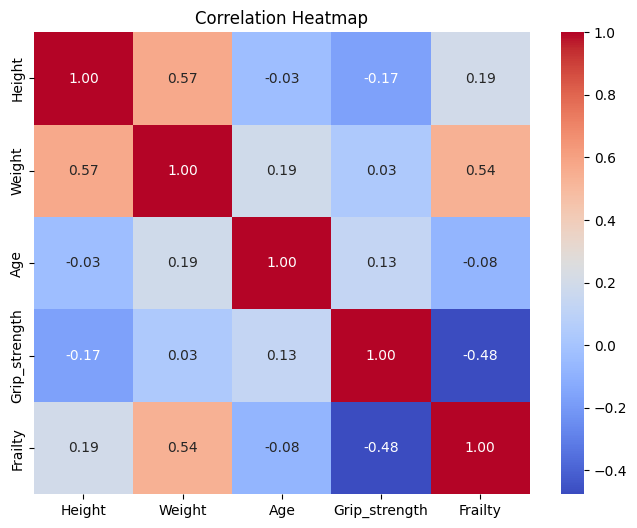

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)



Linear Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                Frailty   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     2.342
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.164
Time:                        20:52:24   Log-Likelihood:                -5.7700
No. Observations:                  10   AIC:                             15.54
Df Residuals:                       8   BIC:                             16.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        

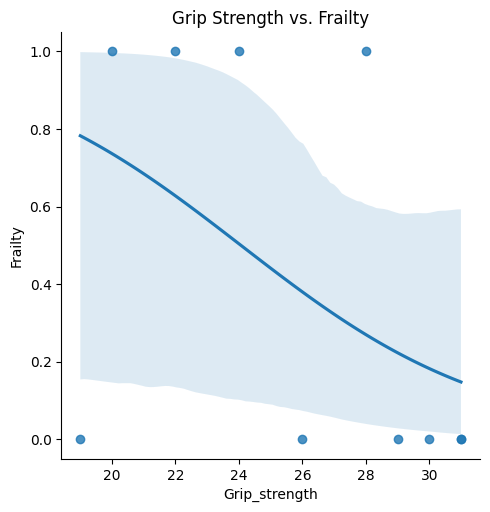

In [ ]:
print("\nDescriptive Statistics:\n", frailty_data.describe())

# Correlation analysis
correlation_matrix = frailty_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

frailty_data.rename(columns={"Grip strength": "Grip_strength"}, inplace=True)

# Perform Linear Regression (Grip Strength vs. Frailty)
model = ols("Frailty ~ Grip_strength", data=frailty_data).fit()
print("\nLinear Regression Summary:\n", model.summary())

# Scatter plot with regression line
sns.lmplot(x="Grip_strength", y="Frailty", data=frailty_data, logistic=True)
plt.title("Grip Strength vs. Frailty")
plt.show()

In [ ]:
frailty_data.to_csv('/content/drive/MyDrive/frailty_data_processed.csv', index=False)

# Generate a summary report
report = f"""
Frailty Analysis Report
------------------------
- Total Participants: {len(frailty_data)}
- Correlation (Grip Strength & Frailty): {correlation_matrix.loc['Grip_strength', 'Frailty']:.2f}
- Regression Coefficients: {model.params}

Conclusion:
- Higher grip strength tends to be associated with lower frailty.
- The regression analysis suggests a potential predictive relationship.

"""

# Save report as a text file
with open('/content/drive/MyDrive/frailty_report.txt', 'w') as file:
    file.write(report)

print("\nReport generated successfully and saved to Google Drive.")


Report generated successfully and saved to Google Drive.
